<a href="https://colab.research.google.com/github/thebabycode/NLP/blob/main/NLP_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install datasets # for huggingfaces

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset
dataset = load_dataset("wiki_hop", "original", split ="train")   # downloading the dataset from huggingface

In [ ]:
df = pd.DataFrame(dataset)
df

,id,question,answer,candidates,supports,annotations
0,WH_train_0,participant_of juan rossell,1996 summer olympics,"[1996 summer olympics, olympic games, sport]","[The 2004 Summer Olympic Games, officially kno...",[]
1,WH_train_1,languages_spoken_or_written john osteen,english,"[english, greek, koine greek, nahuatl, spanish]",[A Christian (or ) is a person who follows or ...,[]
2,WH_train_2,parent_taxon proaigialosaurus,lepidosauria,"[alligatoridae, amphibia, amphisbaenia, animal...",[Reptiles are tetrapod (four-limbed vertebrate...,[]
3,WH_train_3,parent_taxon australosuchus,crocodilia,"[animal, area, crocodile, crocodilia, homo, me...",[Mekosuchinae was a subfamily of crocodiles fr...,[]
4,WH_train_4,occupation cao chong,physicist,"[academic, builder, chancellor, classics, conf...","[Wu (222280), commonly known as Eastern Wu or ...",[]
...,...,...,...,...,...,...
43733,WH_train_43733,place_of_death nikolai bunge,pushkin,"[baltic sea, central, dnieper river, england, ...",[Ukraine (tr. ) is a sovereign state in Easter...,[]
43734,WH_train_43734,subclass_of agung a tamlang,idiophone,"[activity, area, bamboo, being, box, chinese, ...","[Palawan (Pron. , from ), officially the Provi...",[]
43735,WH_train_43735,filming_location caught,new jersey,"[10, 17, 18, 20, 24, 25, 30, florida, mexico, ...",[Caught is a 1996 erotic thriller film about a...,[]
43736,WH_train_43736,located_in_the_administrative_territorial_enti...,county dublin,"[alabama, centre, county dublin, dublin, dubli...",[The N82 road is a national secondary road in ...,[]


In [ ]:
sentence = ''.join(df["supports"][0])
sentence

'The 2004 Summer Olympic Games, officially known as the Games of the XXVIII Olympiad and commonly known as Athens 2004, was a premier international multi-sport event held in Athens, Greece, from 13 to 29 August 2004 with the motto "Welcome Home." 10,625 athletes competed, some 600 more than expected, accompanied by 5,501 team officials from 201 countries. There were 301 medal events in 28 different sports. Athens 2004 marked the first time since the 1996 Summer Olympics that all countries with a National Olympic Committee were in attendance. 2004 marked the return of the games to the city where they began.The Pan-American or Pan American Games (also known colloquially as the Pan Am Games) is a major sporting event in the Americas featuring summer sports, in which thousands of athletes participate in a variety of competitions. The competition is held among athletes from nations of the Americas, every four years in the year before the Summer Olympic Games. The only Winter Pan American Ga

In [ ]:
words = []
for i in range(0,500):

  s = ''.join(df["supports"][i])
  words.append(word_tokenize(s))

In [ ]:
word_list = [item for sublist in words for item in sublist]
word_list

['The',
 '2004',
 'Summer',
 'Olympic',
 'Games',
 ',',
 'officially',
 'known',
 'as',
 'the',
 'Games',
 'of',
 'the',
 'XXVIII',
 'Olympiad',
 'and',
 'commonly',
 'known',
 'as',
 'Athens',
 '2004',
 ',',
 'was',
 'a',
 'premier',
 'international',
 'multi-sport',
 'event',
 'held',
 'in',
 'Athens',
 ',',
 'Greece',
 ',',
 'from',
 '13',
 'to',
 '29',
 'August',
 '2004',
 'with',
 'the',
 'motto',
 '``',
 'Welcome',
 'Home',
 '.',
 "''",
 '10,625',
 'athletes',
 'competed',
 ',',
 'some',
 '600',
 'more',
 'than',
 'expected',
 ',',
 'accompanied',
 'by',
 '5,501',
 'team',
 'officials',
 'from',
 '201',
 'countries',
 '.',
 'There',
 'were',
 '301',
 'medal',
 'events',
 'in',
 '28',
 'different',
 'sports',
 '.',
 'Athens',
 '2004',
 'marked',
 'the',
 'first',
 'time',
 'since',
 'the',
 '1996',
 'Summer',
 'Olympics',
 'that',
 'all',
 'countries',
 'with',
 'a',
 'National',
 'Olympic',
 'Committee',
 'were',
 'in',
 'attendance',
 '.',
 '2004',
 'marked',
 'the',
 'return',


In [ ]:
word_list = word_list[:1000]

In [ ]:
stop_words = stopwords.words('english')  
cleaned_token = []

for word in word_list:
    if word not in stop_words:
        cleaned_token.append(word)
print("This is the unclean version:", len(word_list), word_list)
print("This is the cleaned version:", len(cleaned_token), cleaned_token)

This is the unclean version: 1000 ['The', '2004', 'Summer', 'Olympic', 'Games', ',', 'officially', 'known', 'as', 'the', 'Games', 'of', 'the', 'XXVIII', 'Olympiad', 'and', 'commonly', 'known', 'as', 'Athens', '2004', ',', 'was', 'a', 'premier', 'international', 'multi-sport', 'event', 'held', 'in', 'Athens', ',', 'Greece', ',', 'from', '13', 'to', '29', 'August', '2004', 'with', 'the', 'motto', '``', 'Welcome', 'Home', '.', "''", '10,625', 'athletes', 'competed', ',', 'some', '600', 'more', 'than', 'expected', ',', 'accompanied', 'by', '5,501', 'team', 'officials', 'from', '201', 'countries', '.', 'There', 'were', '301', 'medal', 'events', 'in', '28', 'different', 'sports', '.', 'Athens', '2004', 'marked', 'the', 'first', 'time', 'since', 'the', '1996', 'Summer', 'Olympics', 'that', 'all', 'countries', 'with', 'a', 'National', 'Olympic', 'Committee', 'were', 'in', 'attendance', '.', '2004', 'marked', 'the', 'return', 'of', 'the', 'games', 'to', 'the', 'city', 'where', 'they', 'began.Th

In [ ]:
fdist = FreqDist(word.lower() for word in cleaned_token)
fdist

FreqDist({"''": 4,
          "'s": 2,
          '(': 10,
          ')': 10,
          ',': 59,
          '--': 1,
          '.': 31,
          '.houston': 1,
          '.lakewood': 1,
          '1': 1,
          '10,318': 1,
          '10,625': 1,
          '120': 1,
          '13': 1,
          '13th': 1,
          '14th': 1,
          '16,800-seat': 1,
          '17': 1,
          '19': 1,
          '1921': 1,
          '1924': 1,
          '1959': 1,
          '1969': 1,
          '197': 1,
          '1986': 1,
          '1990': 1,
          '1994': 1,
          '1996': 6,
          '1999': 2,
          '2003': 2,
          '2004': 6,
          '201': 1,
          '21': 1,
          '23': 1,
          '28': 2,
          '29': 1,
          '301': 1,
          '31': 1,
          '4': 1,
          '5,501': 1,
          '52,000': 1,
          '600': 1,
          '760,000': 1,
          ';': 3,
          '``': 4,
          'a': 2,
          'abrahamic': 1,
          'accompanied': 1,
   

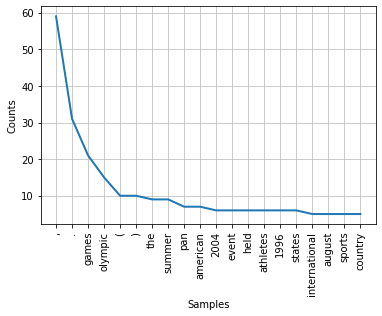

In [ ]:
fdist.plot(20, cumulative = False)